In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

In [172]:
df = pd.read_csv("/Users/emrecanciftci/betik/2024_bio/data/10_Ch10/Supplementary files/heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [174]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [47]:
## k = 1
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [69]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[12 21]
 [15 28]]


              precision    recall  f1-score   support

           0       0.44      0.36      0.40        33
           1       0.57      0.65      0.61        43

    accuracy                           0.53        76
   macro avg       0.51      0.51      0.50        76
weighted avg       0.52      0.53      0.52        76



[36, 29, 26, 24, 27, 27, 24, 26, 25, 24, 22, 24, 23, 23, 23, 23, 22, 25, 25, 25, 25, 24, 25, 24, 25, 25, 22, 23, 26]


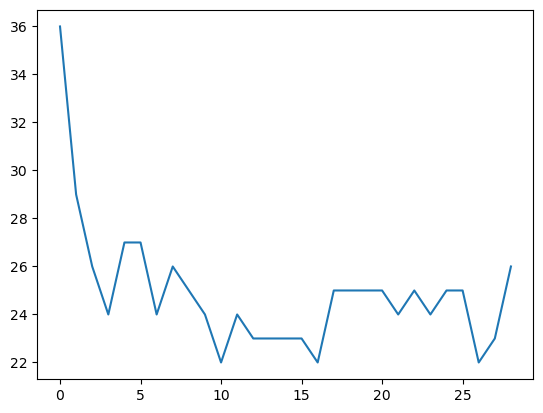

In [92]:
# keeping track of the errors
error = []

for i in range(1, 30):
    classify = KNeighborsClassifier(n_neighbors=i)
    classify.fit(X_train, y_train)
    y_pred = classify.predict(X_test)
    error.append(confusion_matrix(y_test, y_pred)[0,1] + confusion_matrix(y_test, y_pred)[1,0])

print(error)

plt.plot(error)

In [130]:
classify = KNeighborsClassifier(n_neighbors=11)
classify.fit(X_train, y_train)
y_pred = classify.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[20 13]
 [ 9 34]]


              precision    recall  f1-score   support

           0       0.69      0.61      0.65        33
           1       0.72      0.79      0.76        43

    accuracy                           0.71        76
   macro avg       0.71      0.70      0.70        76
weighted avg       0.71      0.71      0.71        76



[16, 17, 12, 12, 12, 11, 11, 10, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 16, 15, 15]
7


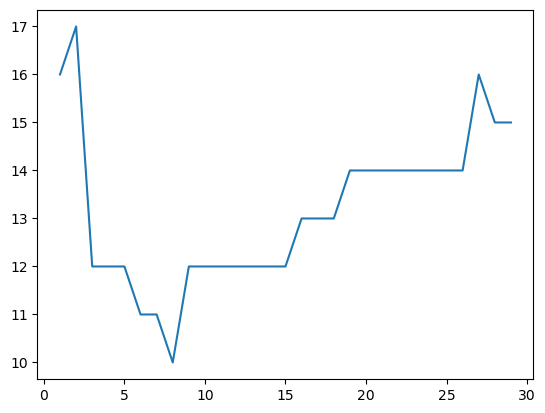

In [213]:
sc = StandardScaler()
X_norm = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=0)

# keeping track of the errors
error = []

for i in range(1, 30):
    classify = KNeighborsClassifier(n_neighbors=i)
    classify.fit(X_train, y_train)
    y_pred = classify.predict(X_test)
    error.append(confusion_matrix(y_test, y_pred)[0,1] + confusion_matrix(y_test, y_pred)[1,0])

print(error)

plt.plot(range(1, 30), error)

In [207]:
classify = KNeighborsClassifier(n_neighbors=8)
classify.fit(X_train, y_train)
y_pred = classify.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[27  6]
 [ 4 39]]


              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.87      0.91      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.87        76
weighted avg       0.87      0.87      0.87        76



In [62]:
new_data = df.iloc[2, :-1].values
new_predict = classify.predict(sc.fit_transform([new_data]))

NameError: name 'classify' is not defined

# 2. Diagnosing the Liver Disease Using K-NN

In [65]:
df = pd.read_csv("/Users/emrecanciftci/betik/2024_bio/data/10_Ch10/Supplementary files/indian_liver_patient.csv")
df.rename({"Dataset":"Target"}, inplace=True, axis=1)
df.Gender = df.Gender.map({"Female":0, "Male":1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [64]:
imputer = SimpleImputer(strategy="mean")
non_nan_data = imputer.fit_transform(df)
df = pd.DataFrame(non_nan_data, columns=df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    float64
 1   Gender                      583 non-null    float64
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    float64
 5   Alamine_Aminotransferase    583 non-null    float64
 6   Aspartate_Aminotransferase  583 non-null    float64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Target                      583 non-null    float64
dtypes: float64(11)
memory usage: 50.2 KB


In [68]:
imputer = KNNImputer(n_neighbors=5)
non_nan_data = imputer.fit_transform(df)
df = pd.DataFrame(non_nan_data, columns=df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    float64
 1   Gender                      583 non-null    float64
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    float64
 5   Alamine_Aminotransferase    583 non-null    float64
 6   Aspartate_Aminotransferase  583 non-null    float64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Target                      583 non-null    float64
dtypes: float64(11)
memory usage: 50.2 KB


In [69]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
sc = StandardScaler()
X_norm = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Text(0, 0.5, 'Error Rate')

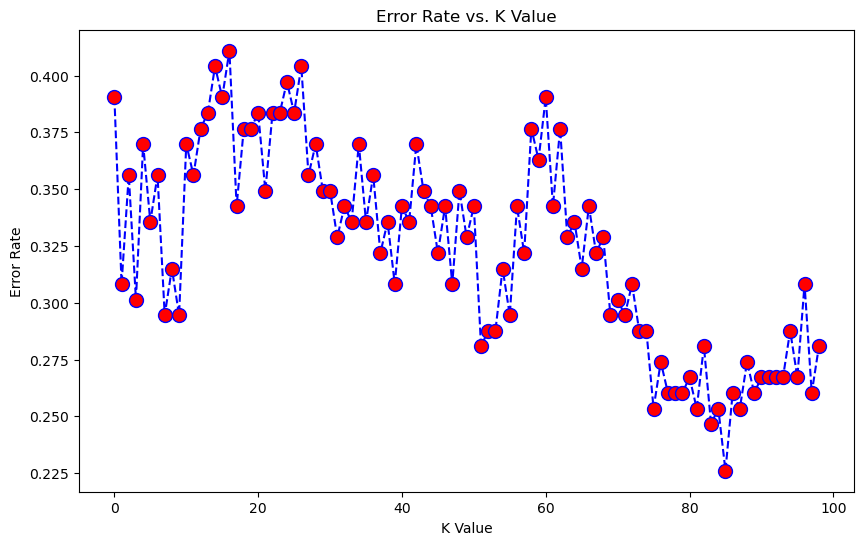

In [74]:
errors = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.mean(pred_i!= y_test))
plt.figure(figsize = (10,6))
plt.plot(errors, color = 'blue', linestyle = 'dashed', marker = "o", markerfacecolor = "red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")